Odczytaj z pliku **Ludność w  Polsce - prognozy.xlsx**, z arkusza **pięcioletnie grupy wieku** dane z roku 2021. Wyświetl je na wykresie słupkowym skumulowanym.

Dodaj legendę, która wyjaśni która część słupków to dane o kobietach, a która o mężczyznach.

Pod każdym słupkiem dodaj etykietę, która powie jakiej grupy wiekowej dany słupek dotyczy.

In [26]:
import os
from cProfile import label

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
    # ticker oznacza te "dzióbki" na skali wykresu - tutaj dot. pionowych kresek na skali


In [10]:
df = pd.read_excel(os.path.join("..", "01_Dane do wykresów", "Ludność w Polsce - prognozy.xlsx"), sheet_name="pięcioletnie grupy wieku")

In [11]:
df.head()

,Rok,Wiek,Ogółem,Mężczyźni,Kobiety
0,2014,0-4,1926441,990515,935926
1,2014,5-9,1998406,1024154,974252
2,2014,10-14,1789943,918424,871519
3,2014,15-19,2024374,1036453,987921
4,2014,20-24,2507493,1278725,1228768


In [14]:
df.sample(10)    # obserwacje które bierze z rozkładu z różnych percentyli, dzięki temu wiemy co jest w danych

,Rok,Wiek,Ogółem,Mężczyźni,Kobiety
167,2021,100+,6907,1199,5708
93,2018,45-49,2464686,1237779,1226907
509,2038,25-29,1994279,1026721,967558
771,2050,75-79,2039470,928140,1111330
205,2023,80-84,812199,280659,531540
47,2016,25-29,2733562,1396320,1337242
732,2048,90-94,716050,209841,506209
445,2035,20-24,1887880,968618,919262
196,2023,35-39,2946956,1503813,1443143
40,2015,95-99,27621,5928,21693


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rok        777 non-null    int64 
 1   Wiek       777 non-null    object
 2   Ogółem     777 non-null    int64 
 3   Mężczyźni  777 non-null    int64 
 4   Kobiety    777 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 30.5+ KB


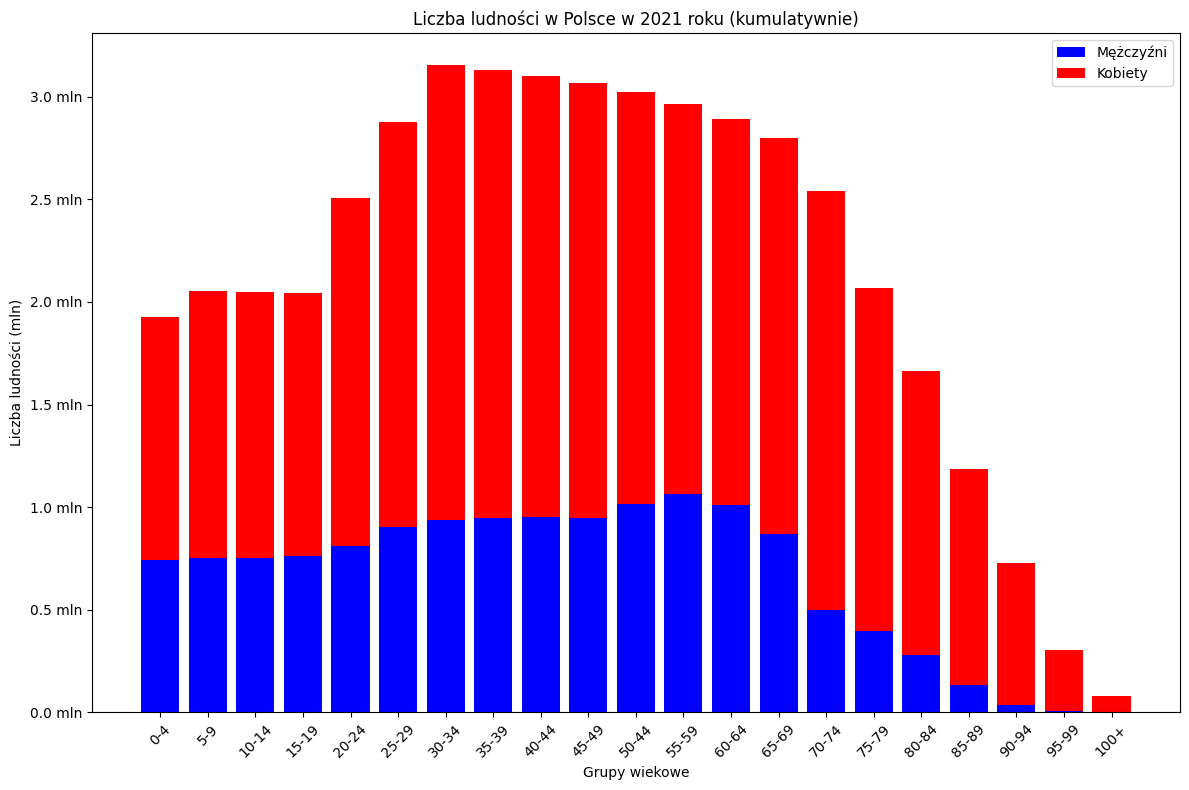

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(df["Wiek"], height=df["Mężczyźni"], color="blue", label="Mężczyźni")
ax.bar(df["Wiek"], height=df["Kobiety"], color="red", bottom=df["Mężczyźni"], label="Kobiety")
#    botttom powoduje, że słupek "Kobiety" zacznie się w miejscu, gdzie skończył się słupek "Mężczyźni", bo inaczej nałożą się na siebie
#    label - etykieta legendy

ax.set_xlabel("Grupy wiekowe")
ax.set_ylabel("Liczba ludności (mln)")
ax.set_title("Liczba ludności w Polsce w 2021 roku (kumulatywnie)")


ax.legend()    # dodaje legendę na wykresie
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1000000} mln'))    # zamiast /1000000 można też użyć /1e6 bo to to samo :)
    # formatter - funkcja mapuje orginalny tick na nowy tick, zwykle jest to funkcja jednorazowego użytku, więc stosuje się tu funkcję lambda
plt.xticks(rotation=45) 


plt.tight_layout()
plt.show()